<h3>Maximum Subarray Sum Problem</h3>
<p> Given a one dimensional array that may contain both positive and negative integers, find the sum of contiguous subarray of numbers which has the largest sum. For example, if the given array is { -2, -5, 6, -2, -3, 1, 5, -6 }, then the maximum subarray sum is 7, with the subarray { 6, -2, -3, 1, 5 }
</p>

In [135]:
import numpy as np
import random as rnd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from numpy import random

In [136]:
def maxCrossingSum(arr, l, m, h, iterations):
 
    sm = 0
    left_sum = float("-inf")
 
    for i in range(m, l-1, -1):
        iterations[0]+=1
        sm = sm + arr[i]
        if (sm > left_sum):
            left_sum = sm
 
    sm = 0
    right_sum = float("-inf")
    for i in range(m + 1, h + 1):
        iterations[0]+=1
        sm = sm + arr[i]
        if (sm > right_sum):
            right_sum = sm
 
    return max(left_sum + right_sum, left_sum, right_sum)
 
def maxSubArraySum(arr, l, h, iterations):
     
    iterations[0]+=1
    if (l == h):
        return arr[l]
 
    m = (l + h) // 2
    
    left = maxSubArraySum(arr, l, m, iterations)
    right = maxSubArraySum(arr, m+1, h, iterations)
    greater = maxCrossingSum(arr, l, m, h, iterations)
    
    if left > greater:
        greater = left
    if right > greater:
        greater = right
        
    return greater

def DivideAndConquerMaxSubarray(arr):
    
    iterations = [0]
    max_sum = maxSubArraySum(arr, 0, len(arr)-1, iterations)
    
    return max_sum, iterations[0]
    

In [137]:
def BruteForceMaxSubarray(arr):
    
    iterations = 0
    maximum = float("-inf")
    
    for i in range(0,len(arr)):
        iterations+=1
        total_sum = 0;
        
        for j in range(i,len(arr)):
            iterations+=1
            total_sum += arr[j]           
            if (total_sum > maximum ):
                maximum = total_sum
                        
    return maximum, iterations

In [138]:
arr = [-1,8,-3,5,-4,-5,-20,30,5,6,-2,6,-70,5,25,-5]

max_sum, it = DivideAndConquerMaxSubarray(arr)
print("Maximum sum: ", max_sum)
print("Iterations: ", iterations[0])

Maximum sum:  45
Iterations:  95


In [139]:
arr = [-1,8,-3,5,-4,-5,-20,30,5,6,-2,6,-70,5,25,-5]

max_sum, it = BruteForceMaxSubarray(arr)
print("Maximum sum: ", max_sum)
print("Iterations: ", it)

Maximum sum:  45
Iterations:  152


In [140]:
x = [10, 25, 50, 100, 200, 500] # Different input sizes
samples = 100                   # Quantity of samples to be averaged
divide_conquer = []             # Quantity of iterations - Divide and conquer approach
brute_force = []                # Quantity of iterations - Brute force approach

In [141]:
# Calculate the average iterations of all approaches
for i in range(len(x)):
    
    it1, it2 = 0,0
    iterations1, iterations2 = 0,0
    
    for k in range (0,samples):
        
        array1 = np.random.randint(-100, 100, size=(x[i]))
        array2 = array1.copy()
        
        max_sum1, iterations1 = BruteForceMaxSubarray(array1)
        max_sum2, iterations2 = DivideAndConquerMaxSubarray(array2)
        
        it1 = it1 + iterations1
        it2 = it2 + iterations2
    
    brute_force.append(it1/samples)
    divide_conquer.append(it2/samples)

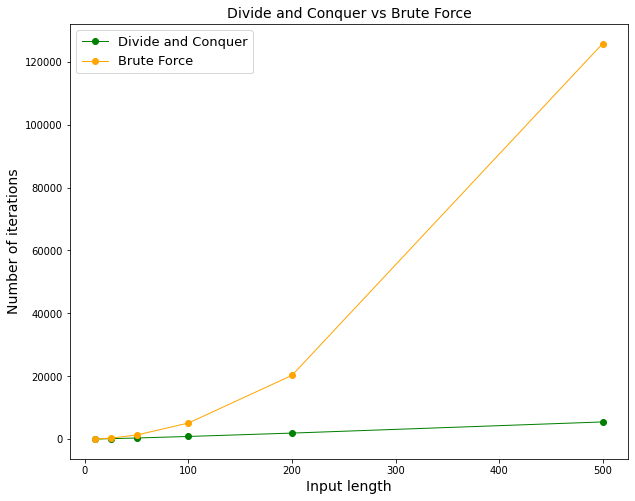

In [142]:
# Plots the complexity graph
plt.figure(figsize=(10, 8))
plt.plot(x,divide_conquer, c="green", ls="-", lw = 1, marker="o", label="Divide and Conquer")
plt.plot(x,brute_force, c="orange", ls="-",  lw = 1, marker="o", label="Brute Force")
plt.title("Divide and Conquer vs Brute Force",fontsize=14)
plt.xlabel("Input length",fontsize=14)
plt.ylabel("Number of iterations",fontsize=14)
plt.legend(fontsize=13)
plt.show()